# NLP - Disaster Tweets - SVM + TF-IDF

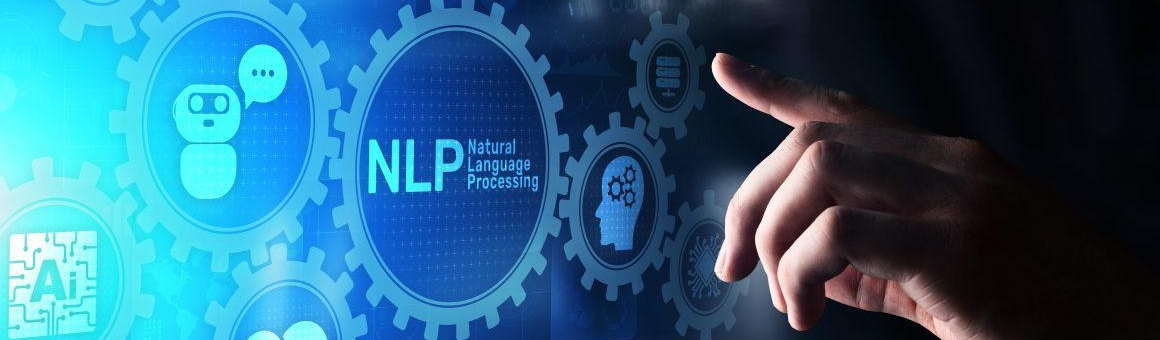

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
#stop words import
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
train_df = pd.read_csv('/Users/Sam/Desktop/Data Science/NLP Projects/Natural Language Processing with Disaster Tweets/Datasets/train.csv')
test_df = pd.read_csv('/Users/Sam/Desktop/Data Science/NLP Projects/Natural Language Processing with Disaster Tweets/Datasets/test.csv')

## Exploratory Analysis

In [5]:
#removing duplicates
print(len(train_df))
train_df = train_df.drop_duplicates('text', keep='last')
print(len(train_df))

7613
7503


In [6]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


0    4307
1    3196
Name: target, dtype: int64


c:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


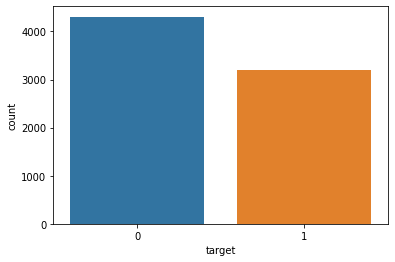

In [8]:
#count plot
sns.countplot(train_df['target'])
print(train_df['target'].value_counts())

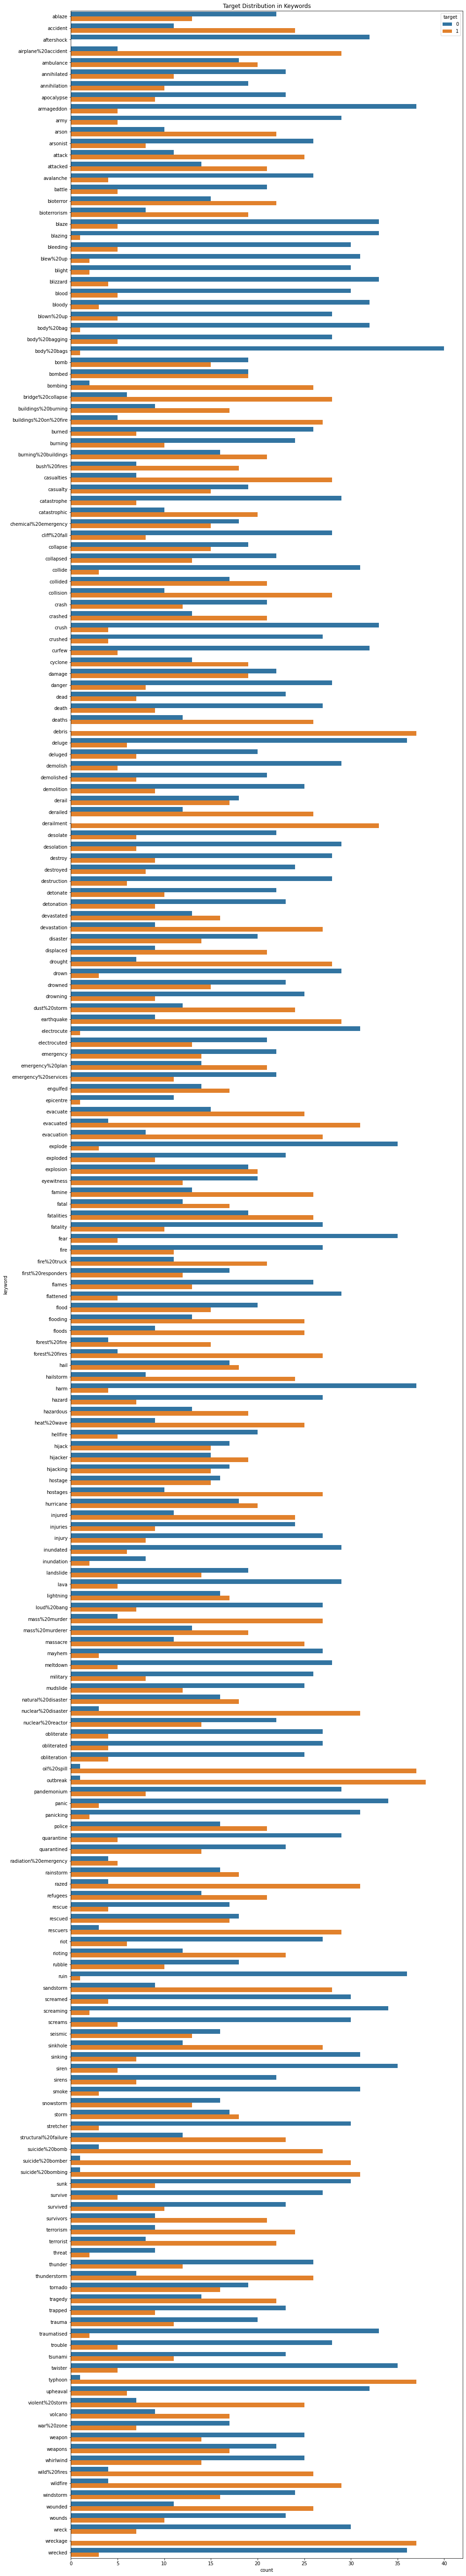

In [9]:
plt.figure(figsize=(15,100))
sns.countplot(data=train_df, y='keyword', hue='target')
plt.title('Target Distribution in Keywords')
plt.show()

## Feature Engineering

Disaster tweets are generally longer in length are more formal in nature and so people tend to include less typos, are more formal with longer words and include more punctuation. Addittionally more official sources such as news agencies tend to report on disasters and may include twitter @'s and hashtags to boost traction. Some may additionally link to articles via URLs. We will also utilise 'stop words', commonly used in NLP to eliminate words that are so commonly used that they carry very little value.
We can therefore utilise feature engineering to extract additional features from the 'text' total.

In [10]:
#word count
def wordCount(x):
    return len(x.split())

train_df['word_count'] = train_df['text'].apply(wordCount)
test_df['word_count'] = test_df['text'].apply(wordCount)

In [11]:
#unique word count
def uniqueWordCount(tweet):
    return len(set(tweet.split()))

train_df['unique_word_count'] = train_df['text'].apply(uniqueWordCount)
test_df['unique_word_count'] = test_df['text'].apply(uniqueWordCount)

In [12]:
#stop word count
stopwords = nltk.corpus.stopwords.words('english')
def stopWordCount(tweet):
    tweet = tweet.lower()
    tweet = tweet.split()
    countStopWords = 0
    for w in tweet:
        if w in stopwords:
            countStopWords += 1

    return countStopWords

train_df['stop_word_count'] = train_df['text'].apply(stopWordCount)
test_df['stop_word_count'] = test_df['text'].apply(stopWordCount)

In [13]:
#mean word length
train_df['mean_word_length'] = train_df['text'].apply(lambda x: np.mean([len(w) for w in (x).split()]))
test_df['mean_word_length'] = test_df['text'].apply(lambda x: np.mean([len(w) for w in (x).split()]))

In [14]:
#character count
charCount = lambda x: len(x)
train_df['char_count'] = train_df['text'].apply(charCount)
test_df['char_count'] = test_df['text'].apply(charCount)

In [15]:
#punctuation count
import string

def punctuationCount(tweet):
    countPunctuation = 0
    for punc in list(string.punctuation):
        countPunctuation += tweet.count(punc)
    
    return countPunctuation

train_df['punctuation_count'] = train_df['text'].apply(punctuationCount)
test_df['punctuation_count'] = test_df['text'].apply(punctuationCount)

In [16]:
#mention count
def mentionCount(x):
    return x.count('@')

train_df['mention_count'] = train_df['text'].apply(mentionCount)
test_df['mention_count'] = test_df['text'].apply(mentionCount)

In [17]:
#hashtag count
def hashtagCount(tweet):
    return tweet.count('#')

train_df['hashtag_count'] = train_df['text'].apply(hashtagCount)
test_df['hashtag_count'] = test_df['text'].apply(hashtagCount)

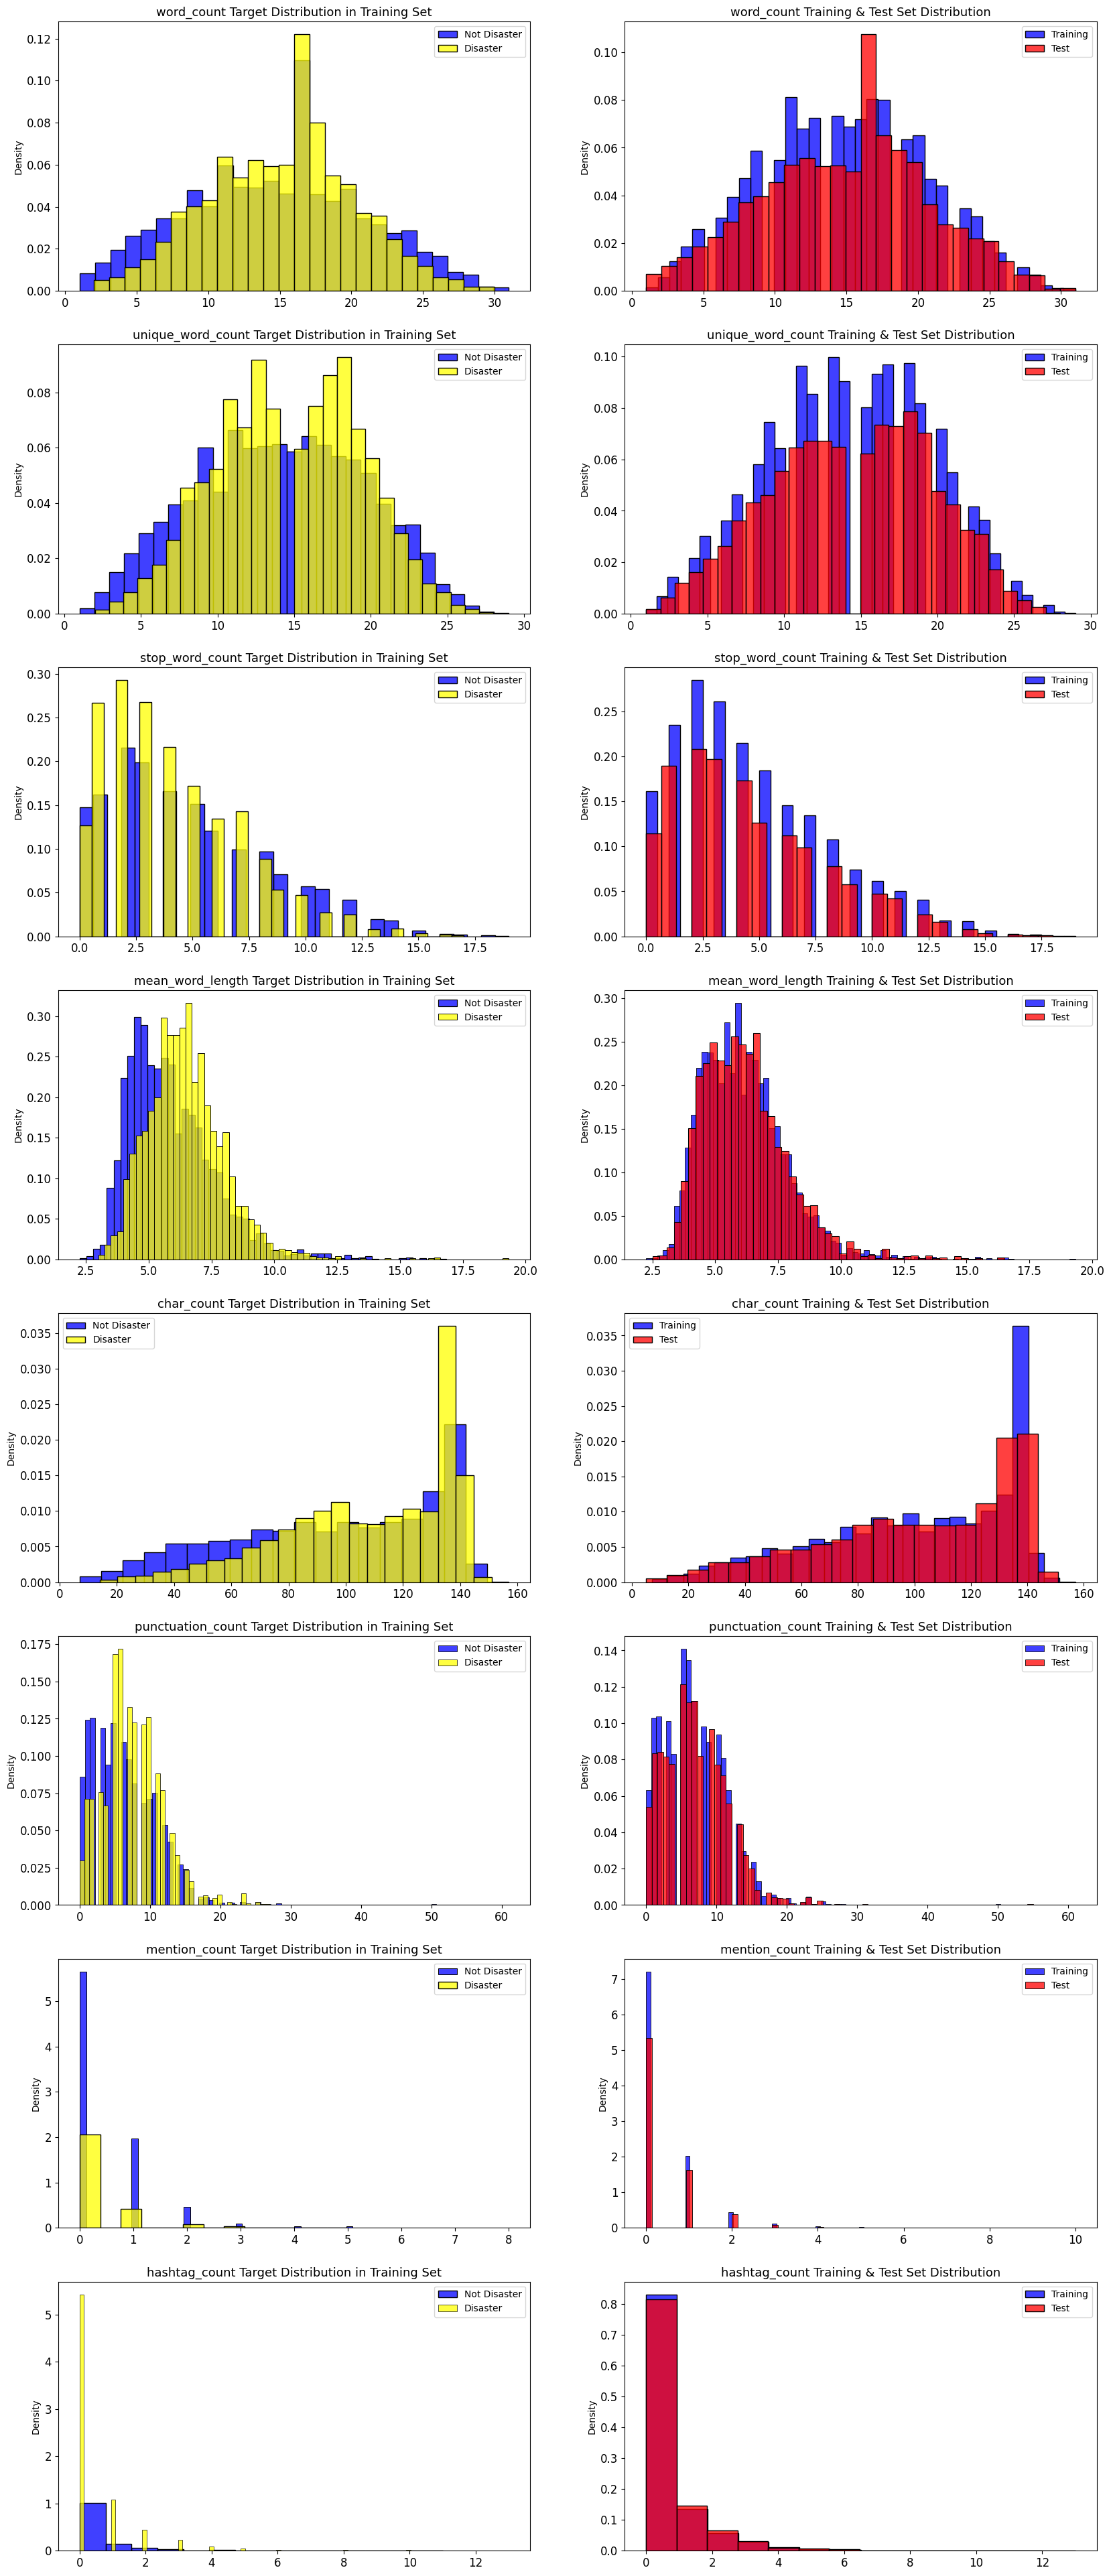

In [18]:
Eng_features = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length', 'char_count', 'punctuation_count', 'mention_count', 'hashtag_count']
Disaster_tweets = train_df['target']==1

fig, axes = plt.subplots(ncols=2, nrows=len(Eng_features), figsize=(20, 50), dpi=100)

for i, feature in enumerate(Eng_features):
    sns.histplot(train_df.loc[~Disaster_tweets][feature], label='Not Disaster', ax=axes[i][0], color='blue', stat="density")
    sns.histplot(train_df.loc[Disaster_tweets][feature], label='Disaster', ax=axes[i][0], color='yellow', stat="density")

    sns.histplot(train_df[feature], label='Training', ax=axes[i][1], color='blue', stat="density")
    sns.histplot(test_df[feature], label='Test', ax=axes[i][1], color='red', stat="density")

    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

Based on the distributions its likely that both training and test data come from the same original dataset / pool, therefore there is no real need in this case to perform an 80/20 validation during modelling, we can just train on the training set and then use it to predict our test.

## Pre-processing

In [19]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"

In [20]:
print(train_df['text'][33])

#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi


In [21]:
import re

def preprocess_text(text):
    text = re.sub(urlPattern,'URL',text)
    for c in string.punctuation:
        text=text.replace(c,"")
    return text

train_df['text'] = train_df['text'].apply(preprocess_text) 
test_df ['text'] = test_df['text'].apply(preprocess_text)

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
print(train_df['text'][33])

AFRICANBAZE Breaking newsNigeria flag set ablaze in Aba URL


In [23]:
def remove_punctuation(text):
    text_nopunc= "".join([c for c in text if c not in string.punctuation])
    return text_nopunc

In [24]:
train_df['text_clean'] = train_df['text'].apply(lambda x: remove_punctuation(x))
test_df['text_clean'] = test_df['text'].apply(lambda x: remove_punctuation(x))
train_df.head()

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,mention_count,hashtag_count,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,13,13,6,4.384615,69,1,0,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,7,7,0,4.571429,38,1,0,0,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to shelter in place are be...,1,22,20,11,5.090909,133,3,0,0,All residents asked to shelter in place are be...
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,8,8,1,7.125000,65,2,0,1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1,16,15,7,4.500000,88,2,0,2,Just got sent this photo from Ruby Alaska as s...


In [25]:
import re
def tokenise(text):
    tokens = re.split('\W+', text)
    return tokens

train_df['text_clean'] = train_df['text_clean'].apply(lambda x: tokenise(x.lower()))
test_df['text_clean'] = test_df['text_clean'].apply(lambda x: tokenise(x.lower()))
train_df.head(2)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,mention_count,hashtag_count,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,13,13,6,4.384615,69,1,0,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,7,7,0,4.571429,38,1,0,0,"[forest, fire, near, la, ronge, sask, canada]"


In [26]:
stopwords[0:10]
def remove_stopwords(text_tokenised):
    text_clean = [word for word in text_tokenised if word not in stopwords]
    return text_clean

train_df['text_clean'] = train_df['text_clean'].apply(lambda x: remove_stopwords(x))
test_df['text_clean'] = test_df['text_clean'].apply(lambda x: remove_stopwords(x))
train_df.head(5)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,mention_count,hashtag_count,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,13,13,6,4.384615,69,1,0,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,7,7,0,4.571429,38,1,0,0,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to shelter in place are be...,1,22,20,11,5.090909,133,3,0,0,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,8,8,1,7.125000,65,2,0,1,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1,16,15,7,4.500000,88,2,0,2,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [27]:
#Lemmatization
#Lemmatization is typically more accurate than stemming but also more computationally expensive, so understanding this tradeoff is important.

In [28]:
import nltk
#nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatization(token_txt):
    text = " ".join([wn.lemmatize(word) for word in token_txt])
    return text

train_df['text_clean'] = train_df['text_clean'].apply(lambda x : lemmatization(x))
test_df['text_clean'] = test_df['text_clean'].apply(lambda x : lemmatization(x))
train_df.head(2)

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count,mention_count,hashtag_count,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,13,13,6,4.384615,69,1,0,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,7,7,0,4.571429,38,1,0,0,forest fire near la ronge sask canada


## TF-IDF Vectorisation and Split

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_df['text_clean'], train_df['target'], stratify=train_df['target'])

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(binary=True)

vectorizer.fit(list(x_train) + list(x_test))
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [31]:
y_text_vec = vectorizer.transform(test_df['text_clean'])

## SVM Modelling and Prediction

In [32]:
from sklearn import svm
svm = svm.SVC(kernel = 'linear', probability=True)
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)
y_pred_svm = svm.predict(x_test_vec)
real_pred_svm = svm.predict(y_text_vec)

In [33]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  79.79744136460555 %


In [34]:
submission = pd.read_csv('/Users/Sam/Desktop/Data Science/NLP Projects/Natural Language Processing with Disaster Tweets/Datasets/sample_submission.csv')
preds = np.where(real_pred_svm > 0.5, 1, 0)
submission["target"]=pd.Series(real_pred_svm)

In [35]:
print(submission)

         id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       0

[3263 rows x 2 columns]


In [36]:
submission.to_csv('submission2.csv', index=False, header=True)